In [25]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt


data = pd.read_csv('/content/Wine.csv.xls')
features = data.drop('Customer_Segment', axis = 1)
target = data['Customer_Segment']


scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)


X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.25, random_state=50)


clf = SVC()
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)

print(f"Test Accuracy before PCA: ", accuracy_score(y_test, y_pred))
print(f"Train Accuracy before PCA: ", accuracy_score(y_train, y_train_pred))

pca = PCA(n_components = 4)
pca.fit(features)
X_transformed = pca.transform(features)
X_transformed.shape


X_train, X_test, y_train, y_test = train_test_split(X_transformed, target, test_size=0.25, random_state=50)


clf = SVC()
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)

print(f"Test Accuracy after PCA: ", accuracy_score(y_test, y_pred))
print(f"Train Accuracy after PCA: ", accuracy_score(y_train, y_train_pred))


Test Accuracy before PCA:  1.0
Train Accuracy before PCA:  0.9924812030075187
Test Accuracy after PCA:  0.7333333333333333
Train Accuracy after PCA:  0.7293233082706767


Logistic Regression Accuracy: 0.7142857142857143
SVM Accuracy: 0.7142857142857143


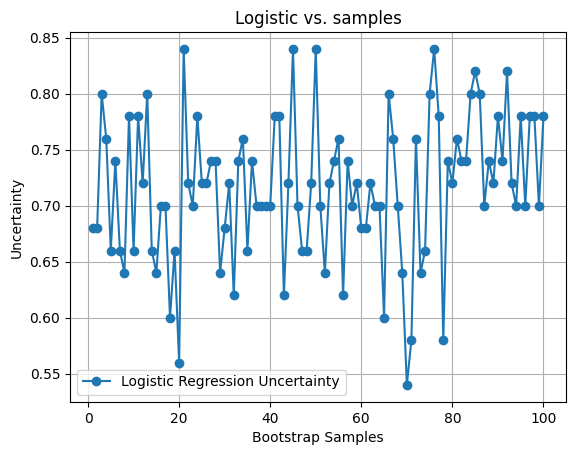

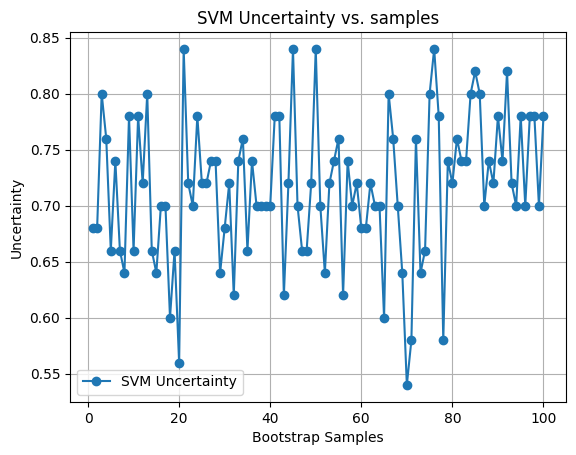

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt



data = pd.read_csv('/content/breast_cancer_survival.csv')



drop_columns = ["Gender", "Histology", "ER status", "PR status", "Surgery_type", "Date_of_Surgery", "Date_of_Last_Visit"]
data = data.drop(columns=drop_columns)



data['modified_Tumour_Stage'] = data['Tumour_Stage'].map({'I': 1, 'II': 2}).fillna(3)
data['mod_Patient_Status'] = (data['Patient_Status'] == 'Alive').astype(int)
data['modified_HER2_status'] = (data['HER2 status'] == 'Positive').astype(int)



X = data.drop(['Tumour_Stage', 'Patient_Status', 'mod_Patient_Status', 'HER2 status'], axis=1)
y = data['mod_Patient_Status']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)



logistic_model = LogisticRegression().fit(X_train, y_train)
svm_model = SVC().fit(X_train, y_train)



accuracy_logistic = accuracy_score(y_test, logistic_model.predict(X_test))
accuracy_svm = accuracy_score(y_test, svm_model.predict(X_test))



print("Logistic Regression Accuracy:", accuracy_logistic)
print("SVM Accuracy:", accuracy_svm)


n_bootstraps = 100
sample_sizes = range(1, 51)


logistic_uncertainty = []
svm_uncertainty = []

for size in sample_sizes:
    logistic_bootstrap_uncertainty = []
    svm_bootstrap_uncertainty = []
    for _ in range(n_bootstraps):

        bootstrap_indices = np.random.choice(len(y_test), size, replace=True)
        X_bootstrap = X_test.iloc[bootstrap_indices]
        y_bootstrap = y_test.iloc[bootstrap_indices]


        logistic_pred = logistic_model.predict(X_bootstrap)
        svm_pred = svm_model.predict(X_bootstrap)


        logistic_accuracy = accuracy_score(y_bootstrap, logistic_pred)
        svm_accuracy = accuracy_score(y_bootstrap, svm_pred)

        logistic_bootstrap_uncertainty.append(logistic_accuracy)
        svm_bootstrap_uncertainty.append(svm_accuracy)

sample_indices = range(1, n_bootstraps + 1)


plt.plot(sample_indices, logistic_bootstrap_uncertainty, label='Logistic Regression Uncertainty', marker='o')
plt.xlabel('Bootstrap Samples')
plt.ylabel('Uncertainty')
plt.title('Logistic vs. samples')
plt.legend()
plt.grid(True)
plt.show()
plt.plot(sample_indices, svm_bootstrap_uncertainty, label='SVM Uncertainty', marker='o')
plt.xlabel('Bootstrap Samples')
plt.ylabel('Uncertainty')
plt.title('SVM Uncertainty vs. samples')
plt.legend()
plt.grid(True)
plt.show()